In [2]:
import pprint as pp
import sys
import matplotlib
import numpy as np
from PIL import Image
sys.path.append("../scripts/util")
import plot_util
from matplotlib.pyplot import text
from matplotlib.markers import *
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
sns.set()
sns.set_style("white")
%matplotlib inline

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


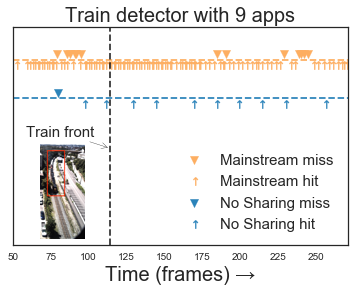

In [128]:
def visualize_deployment(files, objects, plot_dir):
    start = 50
    markerstyle = dict(linestyle=':', markersize=10) # color='cornflowerblue', 
#     settings = {'marker_hit': 6, 'marker_miss': 7, 'y_hit_m': .08, 'y_hit_c': .015, 'line': True}
#     settings = {'marker_hit': '^', 'marker_miss': 'v', 'y_hit_m': .08, 'y_hit_c': .015, 'line': True}
    settings = {'marker_hit': u'$\u2191$', 'marker_miss': 'v', 'y_hit_m': .08, 'y_hit_c': -.008, 'y_miss_c': .015, 'line': True}
#     settings = {'marker_hit': u'$\u2191$', 'marker_miss': u'$\u2193$', 'y_hit_m': .08, 'y_hit_c': -.008, 'y_miss_c': .016, 'line': True}
    
#     settings = {'marker_hit': '.', 'marker_miss': 'x', 'y_hit_m': .08, 'y_hit_c': .03, 'line': False}
    #end = 114
    _, ax = plt.subplots(1)

    for i, (csv_file, obj) in enumerate(zip(files, objects)):
        xs1 = []
        xs2 = []
        ys1 = []
        ys2 = []
        with open(csv_file) as f:
            for line in f:
                vals = line.split(',')
                frame_id = int(vals[0])
                is_analyzed = int(vals[1])
                if is_analyzed == -1 or frame_id <= start:
                    continue
                if is_analyzed == 1:
                    xs1.append(frame_id)
                    ys1.append(i * settings['y_hit_m'] + settings['y_hit_c'])
                else:
                    xs2.append(frame_id)
                    ys2.append(i * settings['y_hit_m'] + settings['y_miss_c'])
        plt.scatter(xs1, ys1,
                    label=obj["label"] + " hit",
                    color=obj["color"],
                    s=70,
#                     facecolors='none',
#                     edgecolors=obj["color"],
                    marker=settings['marker_hit'])
        # Use up and down arrow for hit/miss
        if settings['line']:
            plt.axhline(y=i*settings['y_hit_m']+0.003, linestyle="--", color=obj["color"])
        plt.scatter(xs2, ys2,
                    label=obj["label"] + " miss",
                    color=obj["color"],
                    s=70,
                    marker=settings['marker_miss']),

    train_front = 114
    plt.axvline(x= train_front, linestyle="--", color="black", alpha=0.8)
    plot_file = plot_dir + "/deploy-time-series.pdf"
    plt.title("Train detector with 9 apps", fontsize=20)

    plt.annotate("Train front",
                 xy=(train_front, -.1),
                 xytext=(-84, 12),
                 xycoords='data',
                 fontsize=15,
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle="->"))

    im = Image.open("../output/train-example.jpg")
    im.thumbnail((100, 100))
    plt.figimage(im, xo=40, yo=52, zorder=1)

    
    plt.xlim(start, max(xs1))
    plt.ylim(-.3, .15)
    plt.xlabel(u"Time (frames) →", fontsize=20)
    plt.xticks()
#     plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    plt.tick_params(axis='y', which='both', left='off', top='off', labelleft='off')
    handles, labels = ax.get_legend_handles_labels()
    # Fix legend order to match line order.
    plt.legend(handles[::-1], labels[::-1], loc=4, fontsize=15, ncol=1, frameon=False)
    plt.savefig(plot_file)

# Data created by mainstream analyze_deployment
# Format: frame_id, is_analyzed
f0 = "../output/streamer/deploy/train/train2-10apps-nosharing"
f1 = "../output/streamer/deploy/train/train2-10apps-mainstream"
f2 = "../output/streamer/deploy/train/train2-10apps-maxsharing"
plot_dir = "../plots/deploy"
files = [f0, f1]
objs = [plot_util.NO_SHARING, plot_util.MAINSTREAM]
visualize_deployment(files, objs, plot_dir)

In [127]:
%matplotlib inline
plt.figure()
im = Image.open("../output/train-resized-example.png")
im.thumbnail((100, 100))
plt.figimage(im, xo=10, yo=10, zorder=1, origin='lower')
plt.savefig("asd.pdf", dpi=300)
# plt.show()

In [ ]:
from six import iteritems
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


points = np.ones(3)  # Draw 3 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontdict={'family': 'monospace'})
marker_style = dict(linestyle=':', color='cornflowerblue', markersize=10)


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()


def nice_repr(text):
    return repr(text).lstrip('u')


def split_list(a_list):
    i_half = len(a_list) // 2
    return (a_list[:i_half], a_list[i_half:])


# Plot all un-filled markers
# --------------------------

fig, axes = plt.subplots(ncols=2)

# Filter out filled markers and marker settings that do nothing.
# We use iteritems from six to make sure that we get an iterator
# in both python 2 and 3
unfilled_markers = [m for m, func in iteritems(Line2D.markers)
                    if func != 'nothing' and m not in Line2D.filled_markers]
# Reverse-sort for pretty. We use our own sort key which is essentially
# a python3 compatible reimplementation of python2 sort.
unfilled_markers = sorted(unfilled_markers,
                          key=lambda x: (str(type(x)), str(x)))[::-1]
for ax, markers in zip(axes, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        print(marker, marker_style)
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y * points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('un-filled markers', fontsize=14)


# Plot all filled markers.
# ------------------------

fig, axes = plt.subplots(ncols=2)
for ax, markers in zip(axes, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y * points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('filled markers', fontsize=14)

plt.show()